<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-15%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎄 EXPLORATION 15**  

# **🌲 EXPLORATION 15-1 : Movielens 영화 추천**

## **🌿 01_데이터 준비**

### **🍃 01-1_필요 라이브러리 import**

- **라이브러리 import**

In [ ]:
import os
import math
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

- **implicit 라이브러리 권장 사항**

In [ ]:
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

### **🍃 01-2_필요 데이터 import**

- **데이터 경로 설정**

In [ ]:
rating_file_path = os.getenv('HOME') + '/aiffel/exploration/E-15/data/ratings.dat'
movie_file_path = os.getenv('HOME') + '/aiffel/exploration/E-15/data//movies.dat'

## **🌿 02_데이터 전처리**


### **🍃 02-1_Movielens 데이터셋 전처리**

- **필요 컬럼 분리**

In [ ]:
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_file_path , sep='::', names=ratings_cols, engine='python', encoding='ISO-8859-1')
rating_data_size = len(ratings)

- **데이터 수 확인**

In [ ]:
print('메인 데이터 레코드 수:', rating_data_size)

메인 데이터 레코드 수: 1000209


- **데이터 확인**

In [ ]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


### **🍃 02-1_Movies 데이터셋 전처리**

- **필요 컬럼 분리**

In [ ]:
movies_cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=movies_cols, engine='python', encoding='ISO-8859-1')
movies_data_size = len(movies)

- **데이터 수 확인**

In [ ]:
print('영화 정보 데이터 레코드 수:', movies_data_size)

영화 정보 데이터 레코드 수: 3883


- **데이터 확인**

In [ ]:
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


- **영화 장르 종류 확인**

In [ ]:
genre_attribute = movies["genre"]

genre_set = set()
for _, raw_data in genre_attribute.items():
    data = raw_data.split("|")
    genre_set.update(data)

In [ ]:
for genre in genre_set:
    print(genre)
print("\n총 장르 수:", len(genre_set))

Thriller
Sci-Fi
Children's
Drama
Action
Mystery
Musical
Film-Noir
Fantasy
Western
Comedy
Documentary
Horror
Animation
Romance
Crime
War
Adventure

총 장르 수: 18


### **🍃 02-3_데이터셋 결합**

- **movie_id를 기준으로 두개의 데이터 결합**

In [ ]:
analy_data = ratings.join(movies.set_index("movie_id"), on="movie_id")
analy_data.drop(["movie_id"], axis=1, inplace=True)

- **결합 데이터 확인**

In [ ]:
analy_data

,user_id,rating,timestamp,title,genre
0,1,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,4,978300275,Erin Brockovich (2000),Drama
4,1,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...
1000204,6040,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,4,956715648,Sophie's Choice (1982),Drama


### **🍃 02-4_결합 데이터셋 전처리**

- **이용자 평가 년도 추출**  

In [ ]:
analy_data["timestamp"] = analy_data["timestamp"].apply(lambda x: datetime.fromtimestamp(x).year)

- **데이터 확인**  

In [ ]:
analy_data

,user_id,rating,timestamp,title,genre
0,1,5,2000,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,3,2000,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,3,2000,My Fair Lady (1964),Musical|Romance
3,1,4,2000,Erin Brockovich (2000),Drama
4,1,5,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...
1000204,6040,1,2000,Weekend at Bernie's (1989),Comedy
1000205,6040,5,2000,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,5,2000,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,4,2000,Sophie's Choice (1982),Drama


- **영화 개봉 년도 분할**  

In [ ]:
movie_year = analy_data["title"]
movie_year = movie_year.apply(lambda x: x[-5:-1])

In [ ]:
analy_data["title"] = analy_data["title"].apply(lambda x: x[:-7])
analy_data["movie_year"] = movie_year

- **최종 전처리 데이터 확인**  

In [ ]:
analy_data

,user_id,rating,timestamp,title,genre,movie_year
0,1,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975
1,1,3,2000,James and the Giant Peach,Animation|Children's|Musical,1996
2,1,3,2000,My Fair Lady,Musical|Romance,1964
3,1,4,2000,Erin Brockovich,Drama,2000
4,1,5,2001,"Bug's Life, A",Animation|Children's|Comedy,1998
...,...,...,...,...,...,...
1000204,6040,1,2000,Weekend at Bernie's,Comedy,1989
1000205,6040,5,2000,"Crying Game, The",Drama|Romance|War,1992
1000206,6040,5,2000,Welcome to the Dollhouse,Comedy|Drama,1995
1000207,6040,4,2000,Sophie's Choice,Drama,1982


## **🌿 03_데이터 분석**

### **🍃 03-1_사용자 수 확인**

In [ ]:
user_num = analy_data['user_id'].nunique()

In [ ]:
print("사용자 수:", user_num)

사용자 수: 6040


### **🍃 03-2_연도별 평점 수 확인**

- **2000년에 가장 많은 평점 등록**

In [ ]:
year_data = analy_data[["rating", "timestamp"]]
year_data = year_data.groupby("timestamp").count()

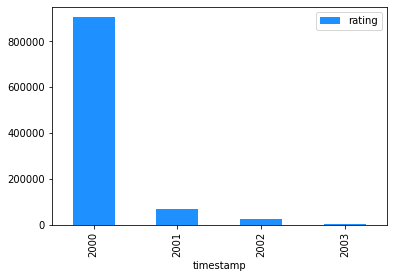

In [ ]:
year_data.plot.bar(color="#1e90ff")
plt.show()

In [ ]:
year_data

,rating
timestamp,
2000,904757
2001,68058
2002,24046
2003,3348


### **🍃 03-3_영화 개봉 연도별 평점 수 확인**

- **최신 영화일수록 평점 수 분포가 많음**  

In [ ]:
year_data = analy_data[["rating", "movie_year"]]
year_data = year_data.groupby("movie_year").count()

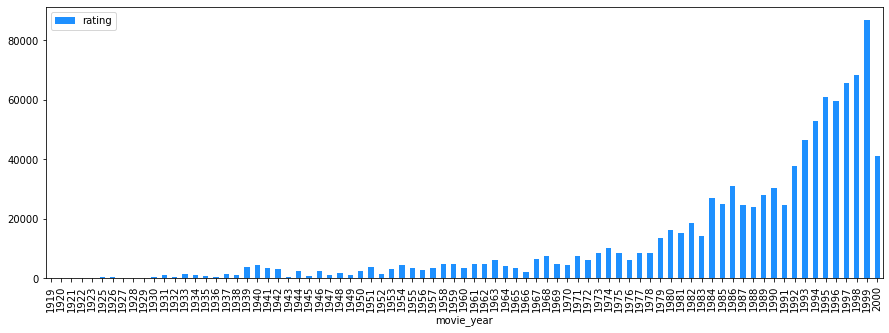

In [ ]:
year_data.plot.bar(color="#1e90ff", figsize = (15, 5))
plt.show()

### **🍃 03-4_이용자별 영화 시청 통계 확인**

- **전체 이용자 수 6040명이 1인당 약 165편의 영화를 시청**

In [ ]:
user_count = analy_data.groupby('user_id')['title'].count(

In [ ]:
user_count.describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: title, dtype: float64

### **🍃 03-5_이용자별 별점 평균 확인**

- **이용자 평균 약 3.8점의 평가 점수를 부여**

In [ ]:
user_median = analy_data.groupby('user_id')['rating'].median()

In [ ]:
user_median.describe()

count    6040.000000
mean        3.840811
std         0.577449
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

### **🍃 03-6_상위 30개 영화 확인**

- **영화 관람 수 및 평점을 고려한 상위 30개 영화 확인**

In [ ]:
view_count = analy_data.groupby('title')["user_id"].count()
rating_mean = analy_data.groupby('title')["rating"].mean()

N, c = view_count.sum(), math.sqrt(2)

#Q - c * 1 * (sqrt(N) / n)
own_value_sys = rating_mean - c * (math.sqrt(N) / view_count)
own_value_sys.sort_values(ascending=False, inplace=True)

In [ ]:
own_value_sys.head(30)

title
Star Wars: Episode IV - A New Hope                3.980822
Shawshank Redemption, The                         3.919461
Raiders of the Lost Ark                           3.915131
American Beauty                                   3.904795
Schindler's List                                  3.896545
Godfather, The                                    3.888726
Sixth Sense, The                                  3.831085
Star Wars: Episode V - The Empire Strikes Back    3.819946
Saving Private Ryan                               3.804236
Silence of the Lambs, The                         3.803196
Matrix, The                                       3.769745
Usual Suspects, The                               3.723858
Princess Bride, The                               3.693546
Fargo                                             3.691858
Braveheart                                        3.656013
Pulp Fiction                                      3.626734
L.A. Confidential                                 

## **🌿 04_2차 데이터 전처리**

### **🍃 04-1_평점 3점 미만 데이터 삭제**

In [ ]:
data = ratings.drop(["timestamp"], axis=1)
data = data[data['rating'] >= 3]

In [ ]:
data

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000203,6040,1090,3
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


### **🍃 04-2_영화 제목 소문자 변환**

In [ ]:
movies['title'] = movies['title'].str.lower()

In [ ]:
movies

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama
4,5,father of the bride part ii (1995),Comedy
...,...,...,...
3878,3948,meet the parents (2000),Comedy
3879,3949,requiem for a dream (2000),Drama
3880,3950,tigerland (2000),Drama
3881,3951,two family house (2000),Drama


### **🍃 04-3_최종 데이터셋 결합**

In [ ]:
data = data.join(movies.set_index("movie_id"), on="movie_id")
data.drop(["movie_id", "genre"], axis=1, inplace=True)

In [ ]:
data

,user_id,rating,title
0,1,5,one flew over the cuckoo's nest (1975)
1,1,3,james and the giant peach (1996)
2,1,3,my fair lady (1964)
3,1,4,erin brockovich (2000)
4,1,5,"bug's life, a (1998)"
...,...,...,...
1000203,6040,3,platoon (1986)
1000205,6040,5,"crying game, the (1992)"
1000206,6040,5,welcome to the dollhouse (1995)
1000207,6040,4,sophie's choice (1982)


## **🌿 05_이용자 및 선호 영화 5편 추가**

In [ ]:
my_favorite = ["toy story (1995)","jumanji (1995)","bug's life, a (1998)","balto (1995)", "babe (1995)"]
my_playlist = pd.DataFrame({'user_id': ["leeoh"]*5,'title': my_favorite,'rating':[5] * 5,})

In [ ]:
if not data.isin({'user_id':["leeoh"]})['user_id'].any():
    data = data.append(my_playlist)

In [ ]:
data

,user_id,rating,title
0,1,5,one flew over the cuckoo's nest (1975)
1,1,3,james and the giant peach (1996)
2,1,3,my fair lady (1964)
3,1,4,erin brockovich (2000)
4,1,5,"bug's life, a (1998)"
...,...,...,...
0,leeoh,5,toy story (1995)
1,leeoh,5,jumanji (1995)
2,leeoh,5,"bug's life, a (1998)"
3,leeoh,5,balto (1995)


## **🌿 06_3차 데이터 전처리**

### **🍃 06-1_user_id, title 속성 인덱싱**

- **유일 데이터 추출**

In [ ]:
user_unique = data['user_id'].unique()
movie_unique = data['title'].unique()

- **인덱싱**

In [ ]:
user_to_idx = {v:k for k,v in enumerate(user_unique)}
item_to_idx = {v:k for k,v in enumerate(movie_unique)}

idx_to_item = {v:k for k,v in item_to_idx.items()}

- **비정상 데이터 제거**

In [ ]:
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()

- **고유키 변환 (user_id)**

In [ ]:
if len(temp_user_data) == len(data):  
    data['user_id'] = temp_user_data
else:
    print('user_id column indexing Fail')

- **고유키 변환 (title)**

In [ ]:
temp_movie_data = data['title'].map(item_to_idx.get).dropna()
if len(temp_movie_data) == len(data):
    data['title'] = temp_movie_data
else:
    print('title column indexing Fail')

### **🍃 06-2_최종 데이터 확인**

In [ ]:
data

,user_id,rating,title
0,0,5,0
1,0,3,1
2,0,3,2
3,0,4,3
4,0,5,4
...,...,...,...
0,6039,5,40
1,6039,5,513
2,6039,5,4
3,6039,5,1513


## **🌿 07_CSR matrix 생성**

### **🍃 07-1_유일 데이터 추출**

In [ ]:
num_user = data['user_id'].nunique()
num_movie = data['title'].nunique()

### **🍃 07-2_csr 행렬 생성**

In [ ]:
csr_data = csr_matrix((data["rating"],(data.user_id, data.title)),shape=(num_user, num_movie))
csr_data_transpose = csr_data.T

In [ ]:
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

### **🍃 07-3_최종 데이터 수 확인**

In [ ]:
print("사용자 num:", num_user)
print("영화 num:", num_movie)

사용자 num: 6040
영화 num: 3628


## **🌿 08_ALS 모델 생성 및 학습**

### **🍃 08-1_모델 생성**

In [ ]:
als_model = AlternatingLeastSquares(factors=512, regularization=0.01, use_gpu=True, iterations=4, dtype=np.float32)

### **🍃 08-2_모델 학습**

In [ ]:
als_model.fit(csr_data_transpose)

  0%|          | 0/4 [00:00<?, ?it/s]

## **🌿 09_ALS 모델 평가**

### **🍃 09-1_선호 영화와 일반 영화 내적 확인**

- **toy story (1995)의 내적은 0.937로 높음**
- **men in black (1997)의 내적은 -0.041으로 낮음**

In [ ]:
user_idx, toystory_idx = user_to_idx["leeoh"], item_to_idx["toy story (1995)"]
user_vector = als_model.user_factors[user_idx]
toystory_vector = als_model.item_factors[toystory_idx]

In [ ]:
print("user vector shape:", user_vector.shape)
print("toy story vector shape:", toystory_vector.shape)

user vector shape: (512,)
toy story vector shape: (512,)


In [ ]:
other = item_to_idx["men in black (1997)"]
other_vector = als_model.item_factors[other]

In [ ]:
print("toy story 내적:", round(np.dot(user_vector, toystory_vector), 3))
print("men in black 내적:", round(np.dot(user_vector, other_vector), 3))

toy story 내적: 0.937
men in black 내적: -0.041


### **🍃 09-2_이용자 선호 영화와 비슷한 영화 추천**

- **이용자 선호 영화를 기반으로 비슷한 영화 15개 추천**  

In [ ]:
def print_similar_item(item_name, idx_to_item, num=5):
    item_idx = item_to_idx[item_name]
    
    similar_item = als_model.similar_items(item_idx, N=num)
    for item_idx, norm in similar_item:
        print(idx_to_item[item_idx] + ":", round(norm, 3))

- **toy story (1995)의 경우 예상과 다르게 호러 장르 영화를 많이 추천해주는 모습을 보임**

In [ ]:
print_similar_item("toy story (1995)", idx_to_item, num=15)

toy story (1995): 1.0
love, etc. (1996): 0.536
separation, the (la séparation) (1994): 0.534
song of freedom (1936): 0.534
horror hotel (a.k.a. the city of the dead) (1960): 0.533
penitentiary ii (1982): 0.533
back stage (2000): 0.532
project moon base (1953): 0.531
broken vessels (1998): 0.531
it's in the water (1998): 0.531
just the ticket (1999): 0.531
follow the bitch (1998): 0.53
american strays (1996): 0.53
bittersweet motel (2000): 0.53
all things fair (1996): 0.53


- **jumanji (1995)의 어린이 장르 영화를 알맞게 추천해주는 모습을 보임**

In [ ]:
print_similar_item("jumanji (1995)", idx_to_item, num=15)

jumanji (1995): 1.0
indian in the cupboard, the (1995): 0.633
simple wish, a (1997): 0.623
flubber (1997): 0.621
merry war, a (1997): 0.621
two bits (1995): 0.621
running free (2000): 0.618
crow: salvation, the (2000): 0.617
amityville: dollhouse (1996): 0.617
meatballs part ii (1984): 0.617
man from down under, the (1943): 0.617
soft toilet seats (1999): 0.616
faithful (1996): 0.616
search for one-eye jimmy, the (1996): 0.616
strike! (a.k.a. all i wanna do, the hairy bird) (1998): 0.616


- **bug's life, a (1998)의 경우 예상과 다르게 서부극 드라마 장르 영화를 많이 추천해주는 모습을 보임**

In [ ]:
print_similar_item("bug's life, a (1998)", idx_to_item, num=15)

bug's life, a (1998): 1.0
buck and the preacher (1972): 0.503
better living (1998): 0.5
secret agent, the (1996): 0.499
tainted (1998): 0.499
stranger, the (1994): 0.498
paralyzing fear: the story of polio in america, a (1998): 0.497
big trees, the (1952): 0.497
open season (1996): 0.497
adrenalin: fear the rush (1996): 0.497
it happened here (1961): 0.496
shopping (1994): 0.496
b*a*p*s (1997): 0.496
solas (1999): 0.496
i got the hook up (1998): 0.496


### **🍃 09-3_이용자 선호 영화 추천**

- **이용자 선호 영화를 기반으로 아직 보지 않은 영화 중 선호 영화 20개 추천**  

In [ ]:
def print_recommend_item(user_name, idx_to_item, num=5):
    user = user_to_idx[user_name]
    
    item_recommended = als_model.recommend(user, csr_data, N=num, filter_already_liked_items=True)
    for item_idx, norm in item_recommended:
        print(idx_to_item[item_idx] + ":", round(norm, 3))

- **대부분 애니메이션, 어린이 장르를 선호 영화로 선택했던 다섯편의 영화와 동일하거나 비슷한 장르의 영화를 알맞게 추천**

In [ ]:
print_recommend_item("leeoh", idx_to_item, num=20)

toy story 2 (1999): 0.231
aladdin (1992): 0.227
babe: pig in the city (1998): 0.161
matilda (1996): 0.161
wrong trousers, the (1993): 0.144
fly away home (1996): 0.144
mulan (1998): 0.14
indian in the cupboard, the (1995): 0.138
santa clause, the (1994): 0.137
chicken run (2000): 0.137
antz (1998): 0.132
lion king, the (1994): 0.127
stuart little (1999): 0.125
anastasia (1997): 0.124
space jam (1996): 0.123
honey, i shrunk the kids (1989): 0.12
james and the giant peach (1996): 0.118
hercules (1997): 0.113
searching for bobby fischer (1993): 0.109
secret garden, the (1993): 0.107


### **🍃 09-3_이용자 선호 영화 추천 기여도 확인**

- **추천 받은 영화 중 3편을 골라 선호도가 표시되어 있는 영화 중 어느 영화가 추천에 많은 기여를 했는지 확인**

In [ ]:
def print_explain_item(user_name, item_name, idx_to_item):
    explain = als_model.explain(
        user_to_idx[user_name],
        csr_data,
        itemid=item_to_idx[item_name])
    
    for item_idx, norm in explain[1]:
        print(idx_to_item[item_idx] + ":", round(norm, 3))

- **toy story 2 (1999)의 경우 같은 시리즈인 toy story의 기여도가 0.163으로 가장 높음**

In [ ]:
print_explain_item("leeoh", "toy story 2 (1999)", idx_to_item)

toy story (1995): 0.163
bug's life, a (1998): 0.083
babe (1995): 0.037
jumanji (1995): -0.02
balto (1995): -0.046


- **mulan (1998)의 경우 같은 2D 애니메이션 장르인 blato의 기여도가 0.058으로 가장 높음**

In [ ]:
print_explain_item("leeoh", "mulan (1998)", idx_to_item)

balto (1995): 0.058
bug's life, a (1998): 0.035
jumanji (1995): 0.02
toy story (1995): 0.018
babe (1995): -0.003


- **lion king, the (1994)의 경우 어린이 장르로 같이 분류되는 jumanji의 기여도가 0.057로 가장 높음**

In [ ]:
print_explain_item("leeoh", "lion king, the (1994)", idx_to_item)

jumanji (1995): 0.057
toy story (1995): 0.048
bug's life, a (1998): 0.014
balto (1995): 0.004
babe (1995): -0.013


## **🌿 10_결론**

- **이용자 선호 영화와 비슷한 영화 추천: 생각보다 적절하지 않은 영화를 많이 추천**  
생각보다 이용자 선호 영화와 비슷한 영화를 추천 받았을 때 적절하지 않은 영화를 많이 추천한다. 이유를 추측해보자면 데이터셋 크기에 비해 내가 선택한 영화가 어린이, 애니메이션 영화에 편중된 선택을 해서 그렇다고 생각한다. 실제로 내가 넷플릭스 같은 영화 추천 알고리즘을 사용할 때에도 장르나 국가만 같은 경우를 추천하는 경우가 꽤 있는데 이런 부분이 동일하게 적용되면 그렇게 추천을 진행할 수 있을 것 같다. 애니메이션 장르를 제외한 어린이 장르의 경우에는 그래도 나름 적절한 영화를 추천한 것을 보면 모델 자체의 문제라기 보다는 데이터의 분류가 더 세분화해서 진행되지 않았거나, 데이터의 양 자체가 적은 것이 문제라는 생각이 든다.  

- **이용자 선호 영화 추천: 알맞은 영화를 추천**  
이용자 선호 영화의 경우에는 비슷한 영화 추천과 다르게 애니메이션이나 어린이 영화로 적절하게 영화를 추천해주는 모습을 보인다.

<hr>